In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline





# adata_core

In [2]:
sc.settings.figdir = "sfig1"


In [3]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(20,20))


In [4]:
# adata_core=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v4')
PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_healthy_core.h5ad'
adata_core=sc.read_h5ad(PATH)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


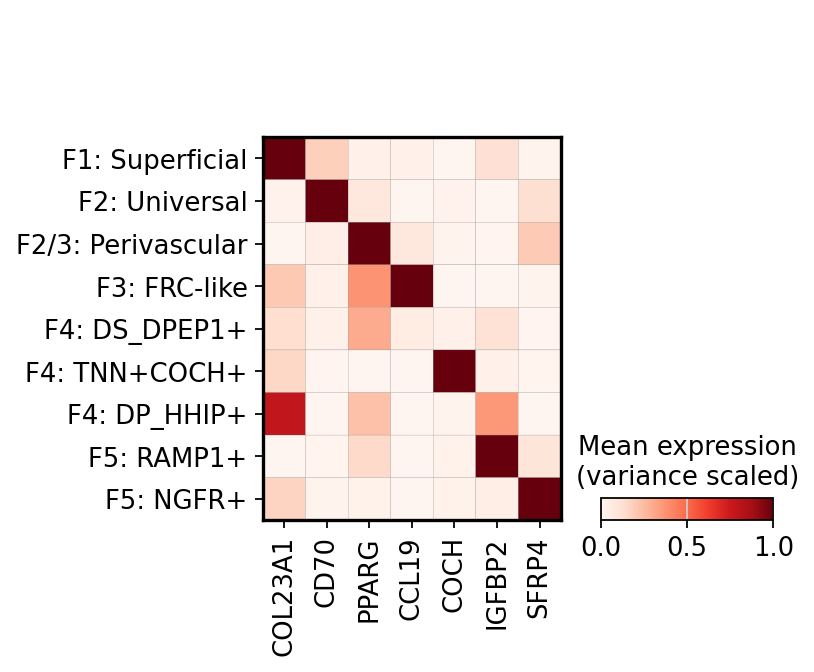

In [5]:

GENES = ['COL23A1', 'CD70', 'PPARG', 'CCL19', 'COCH', 'IGFBP2', 'SFRP4']


#adata_5k_fig2_withfb = adata_5k_fig2[adata_5k_fig2.obs["celltypes_Fig2"].str.startswith("F")]

sc.pl.matrixplot(
    adata_core,
    GENES,
    groupby="corefb_names2",
    standard_scale="var",
    dendrogram=False,
    cmap="Reds",
    #dot_max=0.5,
    colorbar_title="Mean expression\n(variance scaled)",
  #  categories_order=  ['F1: Superficial', 'F2: Universal', 'F2/3: Stroma_PPARG+', 'F3: FRC-like', 'F4: DS_DPEP1+', 'F4: TNN+COCH+',
   #                     'F5: Schwann-like',]
  
) 

/tmp/ipykernel_8479/2692670234.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata_core.obs.groupby(['corefb_names2', 'Site_status2']).size().unstack(fill_value=0)


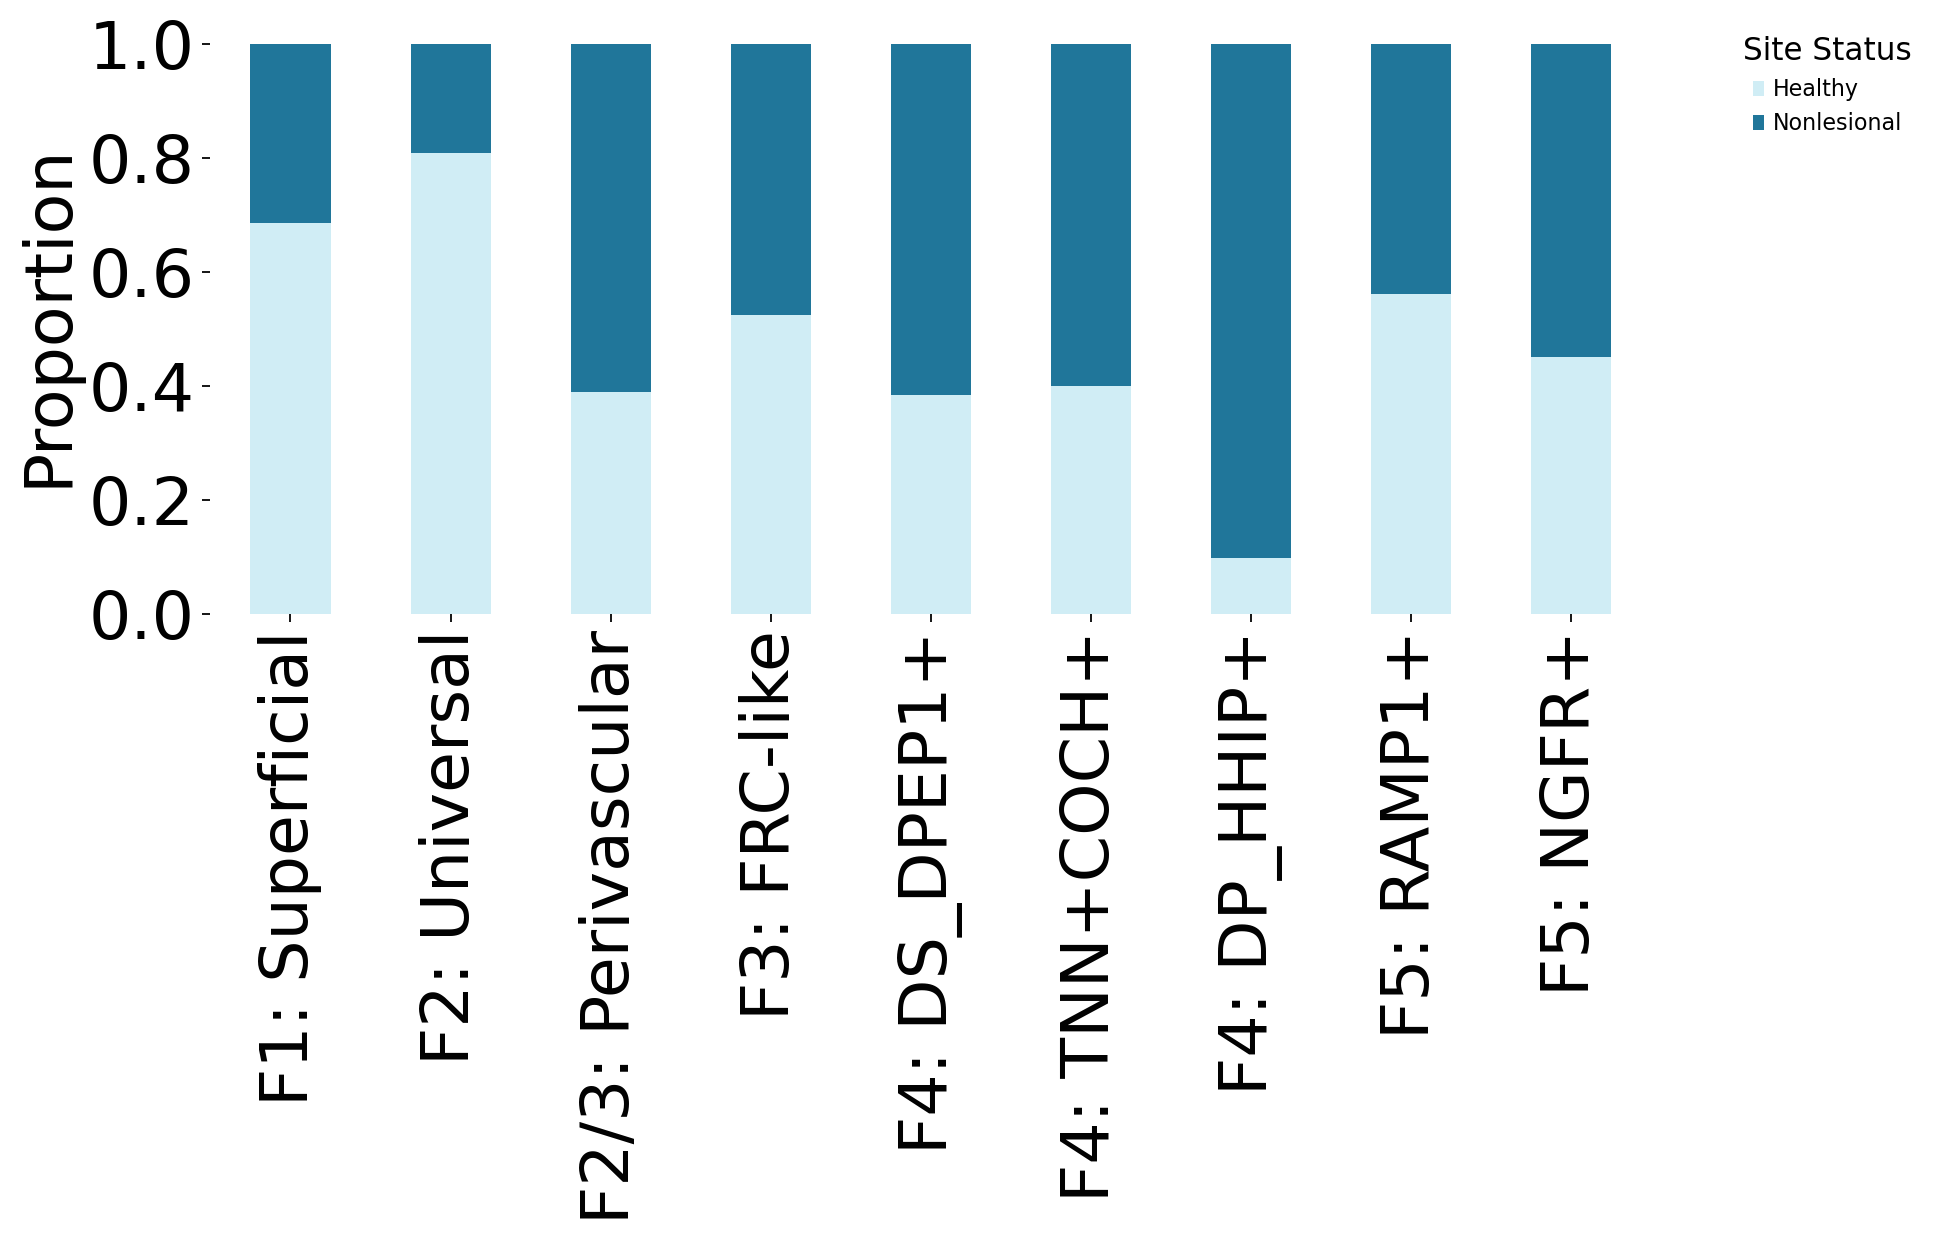

In [6]:
custom_colors = {
    "Healthy": "#d0edf5",       
    "Nonlesional": "#20769a"  
}

grouped = adata_core.obs.groupby(['corefb_names2', 'Site_status2']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(12, 6))

color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]
proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)
plt.xlabel('', fontsize=2)
plt.ylabel('Proportion', fontsize=30)  
legend = plt.legend(title='Site Status', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=10)
plt.grid(False) 
plt.box(False)
plt.tight_layout()
plt.xticks(rotation=90, fontsize=30)  
plt.yticks(fontsize=30)
plt.savefig("sfig1/barplot_bysitestatus.pdf", format="pdf", bbox_inches="tight",dpi=300)
plt.show()


/tmp/ipykernel_8479/2778294286.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata_core.obs.groupby(['dataset_id3', 'corefb_names_simple']).size().unstack(fill_value=0)


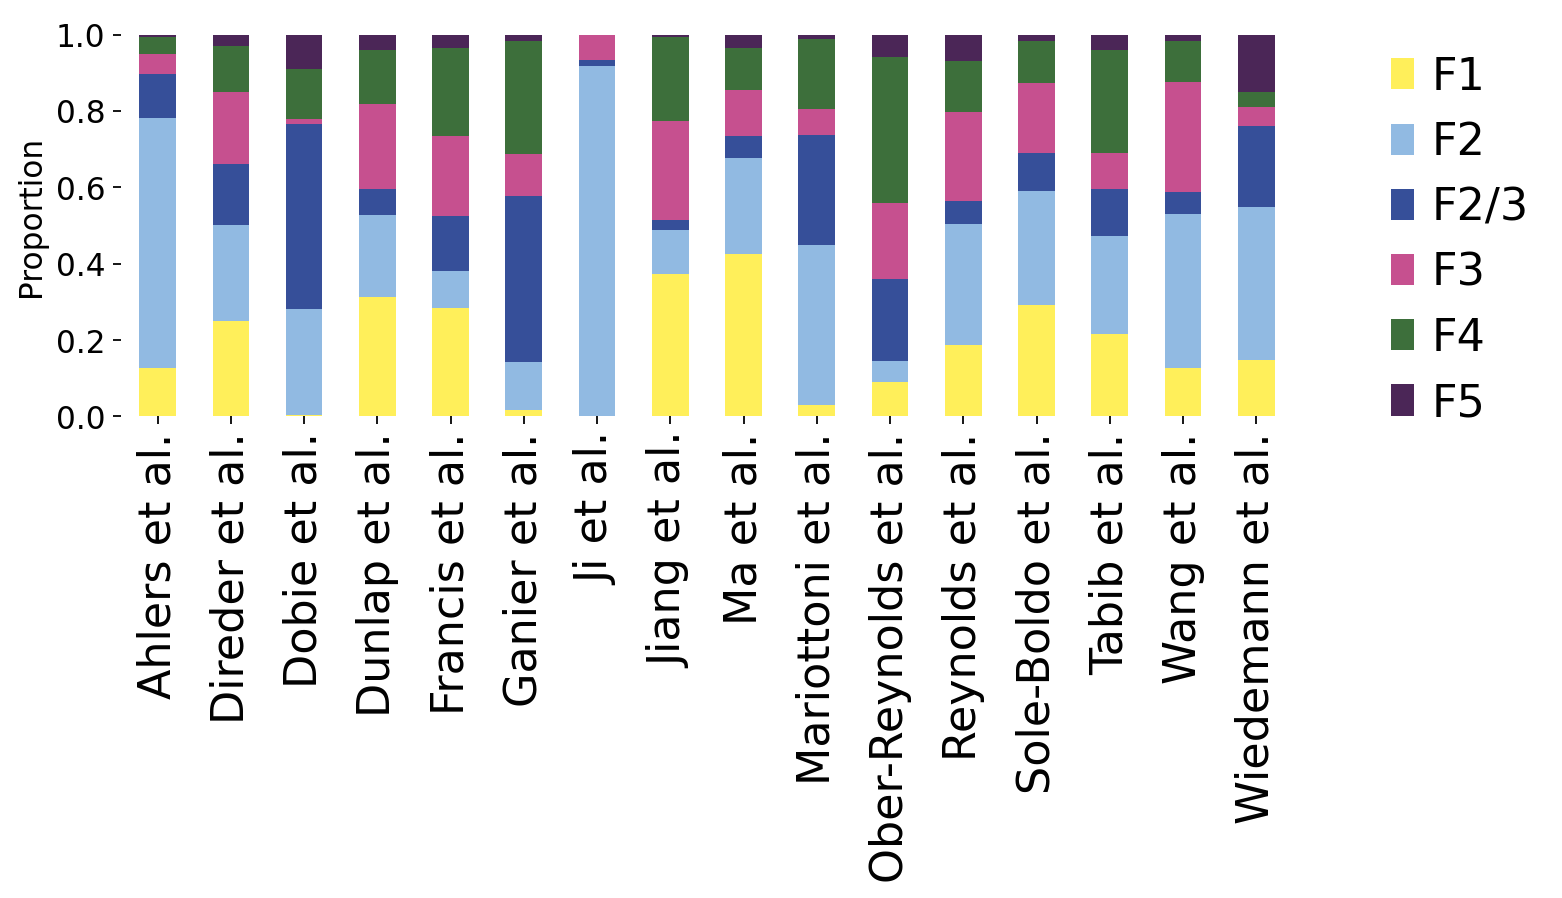

In [7]:
custom_colors ={'F2':  '#91bae2',
                'F1':'#ffef5a',
                'F3': '#c6508f',
                'F4': '#3d6f3b',
                'F2/3':  '#364f99',
                'F5':  '#4b2657'

               }

grouped = adata_core.obs.groupby(['dataset_id3', 'corefb_names_simple']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(10, 5))
color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]

proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)

plt.xlabel('')  
plt.ylabel('Proportion')  
legend = plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=20)
plt.grid(False) 
plt.box(False)  

plt.tight_layout()
plt.xticks(rotation=90, fontsize=20)  # Rotate and resize the labels to prevent overlap
plt.savefig("sfig1/barplot_bydataset.pdf", format="pdf", bbox_inches="tight", dpi=300)

plt.show()


/tmp/ipykernel_8479/1901751934.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata_core.obs.groupby(['dataset_id3', 'corefb_names_simple']).size().unstack(fill_value=0)


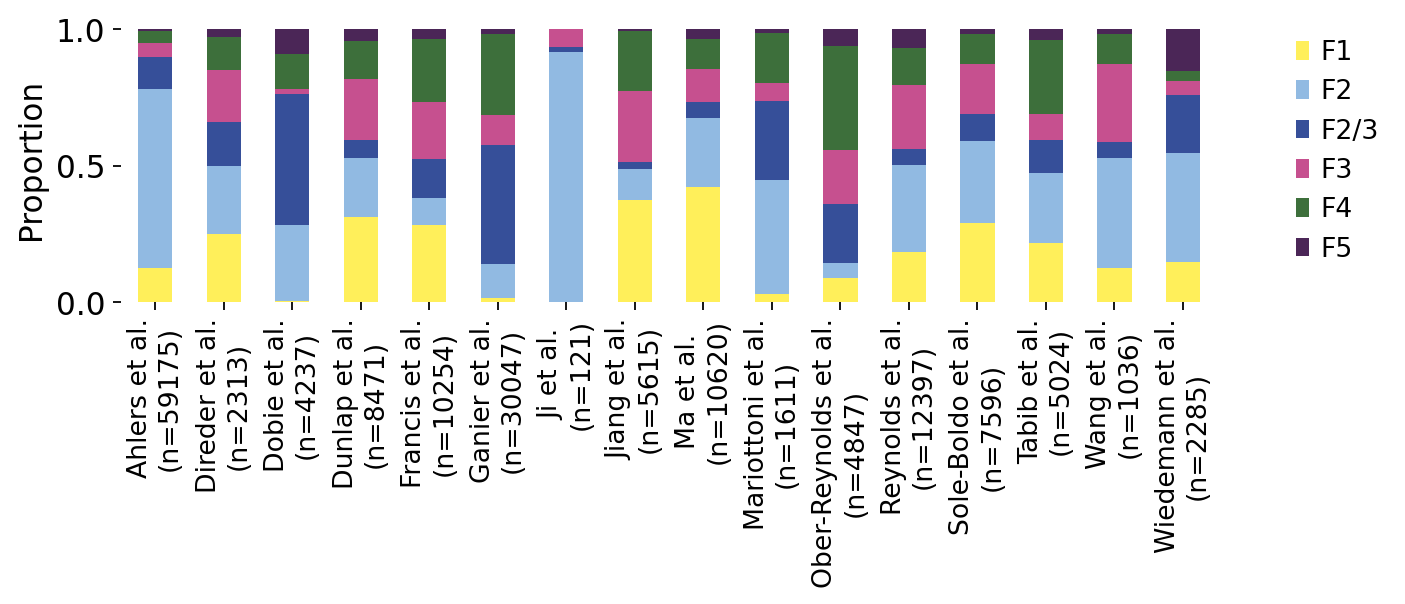

In [8]:
grouped = adata_core.obs.groupby(['dataset_id3', 'corefb_names_simple']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
dataset_id3_counts = grouped.sum(axis=1)
fig, ax = plt.subplots(figsize=(9
                                , 4))
color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]
proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)

xtick_labels = [f"{dataset_id3}\n(n={count})" for dataset_id3, count in dataset_id3_counts.items()]
ax.set_xticks(np.arange(len(xtick_labels)))   
ax.set_xticklabels(xtick_labels, rotation=90, fontsize=12)  
plt.xlabel('')  
plt.ylabel('Proportion', fontsize=14)  
legend = plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=12)
plt.grid(False)  
plt.box(False)  
plt.savefig("sfig1/barplot_bydataset.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.tight_layout()
plt.show()

In [9]:
# grouped = adata_core.obs.groupby(['DonorID', 'corefb_names_simple']).size().unstack(fill_value=0)
# proportions = grouped.div(grouped.sum(axis=1), axis=0)
# fig, ax = plt.subplots(figsize=(20, 3))
# color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]
# proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)

# plt.xlabel('Sample number')  
# plt.ylabel('Proportion')  
# legend = plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=20)
# plt.grid(False)  
# plt.box(False)  
# ax.set_xticks(np.arange(len(proportions.index)))
# ax.set_xticklabels(np.arange(1, len(proportions.index) + 1), rotation=0, fontsize=5)
# plt.tight_layout()
# plt.savefig("sfig1/barplot_bysample.pdf", dpi=300, format="pdf", bbox_inches="tight")

# plt.show()




/tmp/ipykernel_8479/887951813.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata_core.obs.groupby(['DonorID', 'corefb_names_simple']).size().unstack(fill_value=0)
/tmp/ipykernel_8479/887951813.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


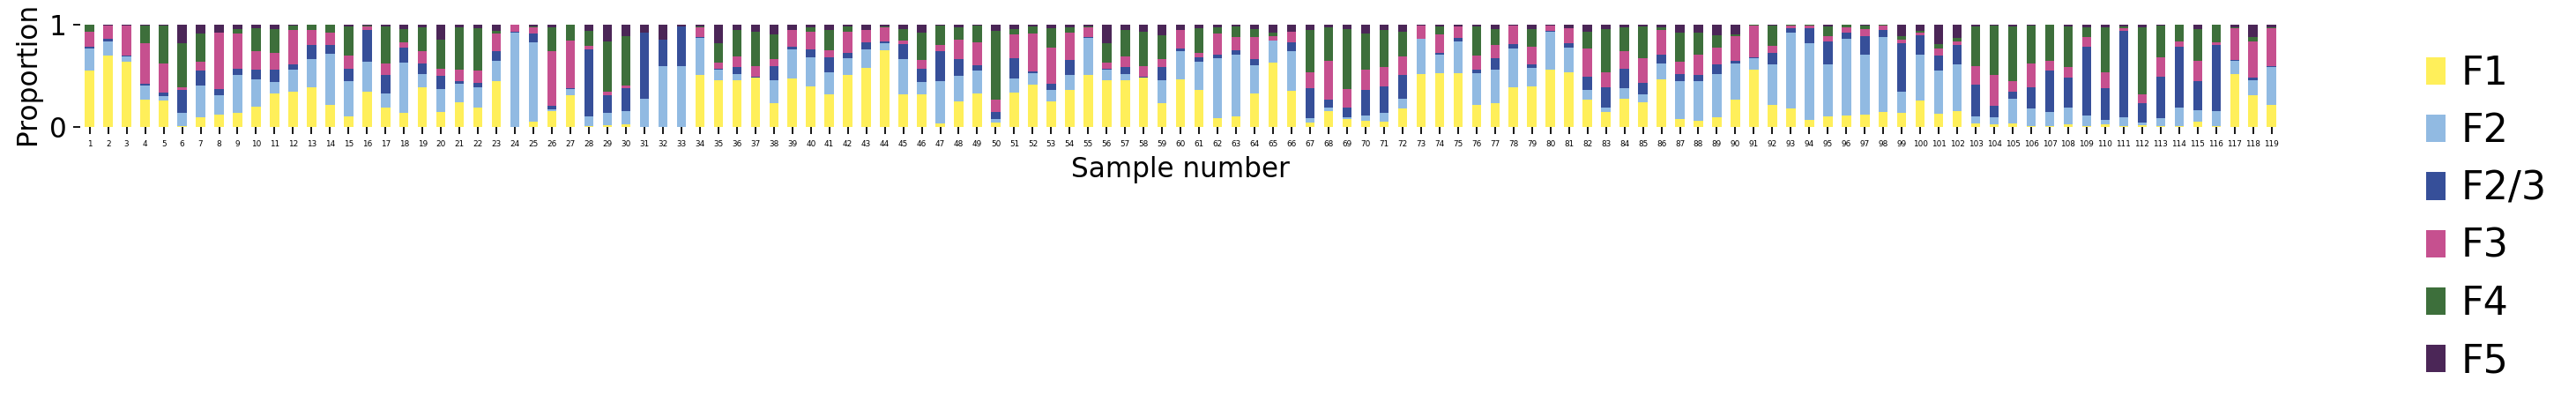

In [10]:
grouped = adata_core.obs.groupby(['DonorID', 'corefb_names_simple']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(20, 1))
color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]
proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)

plt.xlabel('Sample number')  
plt.ylabel('Proportion')  
legend = plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=20)
plt.grid(False)  
plt.box(False)  
ax.set_xticks(np.arange(len(proportions.index)))
ax.set_xticklabels(np.arange(1, len(proportions.index) + 1), rotation=0, fontsize=4)
plt.tight_layout()
plt.savefig("sfig1/barplot_bysample.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()




In [11]:
adata_core.obs["Sex"]=[x[0] for x in adata_core.obs["Sex"]]
adata_core.obs["Sex"].value_counts()

Sex
M    127188
F     33440
U      5021
Name: count, dtype: int64

In [12]:
adata_core.obs["Sex"] = [x if x != "U" else "Unknown" for x in adata_core.obs["Sex"]]


In [13]:
#adata_core.obs["Sex2"] = [x if x != "U" else "Unknown" for x in adata_core.obs["Sex"]]


# custom_colors = {
#     "M": "#d0edf5",   
#     "F": "#20769a" , 
#     "Unknown": "lightgrey"
# }
# # custom_colors = {
# #     "M": "#FDBA74",   
# #     "F": "#F5A3C7" , 
# #     "Unknown": "lightgrey"
# # }
 
 

# grouped = adata_core.obs.groupby(['corefb_names_simple', 'Sex2']).size().unstack(fill_value=0)
# proportions = grouped.div(grouped.sum(axis=1), axis=0)
# fig, ax = plt.subplots(figsize=(7, 7))
# color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]
# proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)
# plt.xlabel('')   
# plt.ylabel('Proportion')   
# legend = plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=20)
# plt.grid(False)  
# plt.box(False)  

# plt.tight_layout()
# plt.xticks(rotation=90, fontsize=20)   
# plt.savefig("sfig1/barplot_bysex.pdf", format="pdf", bbox_inches="tight", dpi=300)

# plt.show()

/tmp/ipykernel_8479/1852595757.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata_core.obs.groupby(['corefb_names_simple', 'Sex2']).size().unstack(fill_value=0)


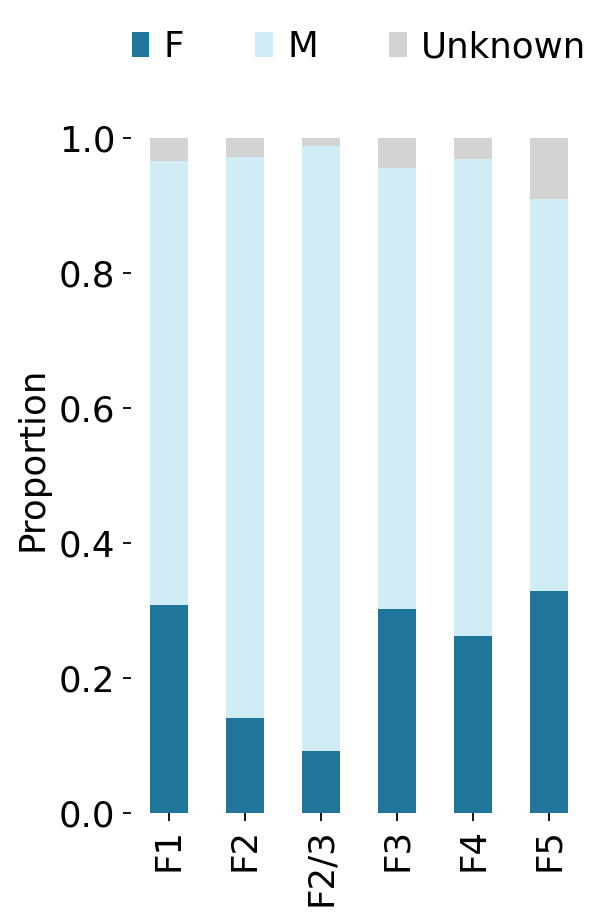

In [14]:
import matplotlib.pyplot as plt
FONTSIZE=16



# Ensure correct column assignment
adata_core.obs["Sex2"] = [x if x != "U" else "Unknown" for x in adata_core.obs["Sex"]]

# Define colors
custom_colors = {
    "M": "#d0edf5",   
    "F": "#20769a" , 
    "Unknown": "lightgrey"
}

# Group and normalize counts
grouped = adata_core.obs.groupby(['corefb_names_simple', 'Sex2']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Create figure
fig, ax = plt.subplots(figsize=(4, 6))

# Assign colors
color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]

# Plot stacked bar chart
proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)

# Format plot
plt.xlabel('')
plt.ylabel('Proportion',fontsize=FONTSIZE)
plt.grid(False)
plt.box(False)
# Adjust legend to be in a single row
plt.legend(
    title='', 
    bbox_to_anchor=(0.5, 1.15),  # Centered above the plot
    loc='upper center', 
    frameon=False, 
    fontsize=FONTSIZE,
    ncol=3  # Single row
)

# Improve layout
plt.xticks(rotation=90, fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)

plt.tight_layout()

# Save figure
plt.savefig("sfig1/barplot_bysex.pdf", format="pdf", bbox_inches="tight",dpi=300)

# Show
plt.show()

In [27]:
adata_core2.obs["corefb_names_simple"].unique()

['F2', 'F1', 'F3', 'F4', 'F2/3', 'F5']
Categories (6, object): ['F1' < 'F2' < 'F2/3' < 'F3' < 'F4' < 'F5']

{'M': '#d0edf5', 'F': '#20769a', 'Unknown': 'lightgrey'}

/tmp/ipykernel_8479/3837813853.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata_core2.obs.groupby(['Location', 'corefb_names_simple']).size().unstack(fill_value=0)


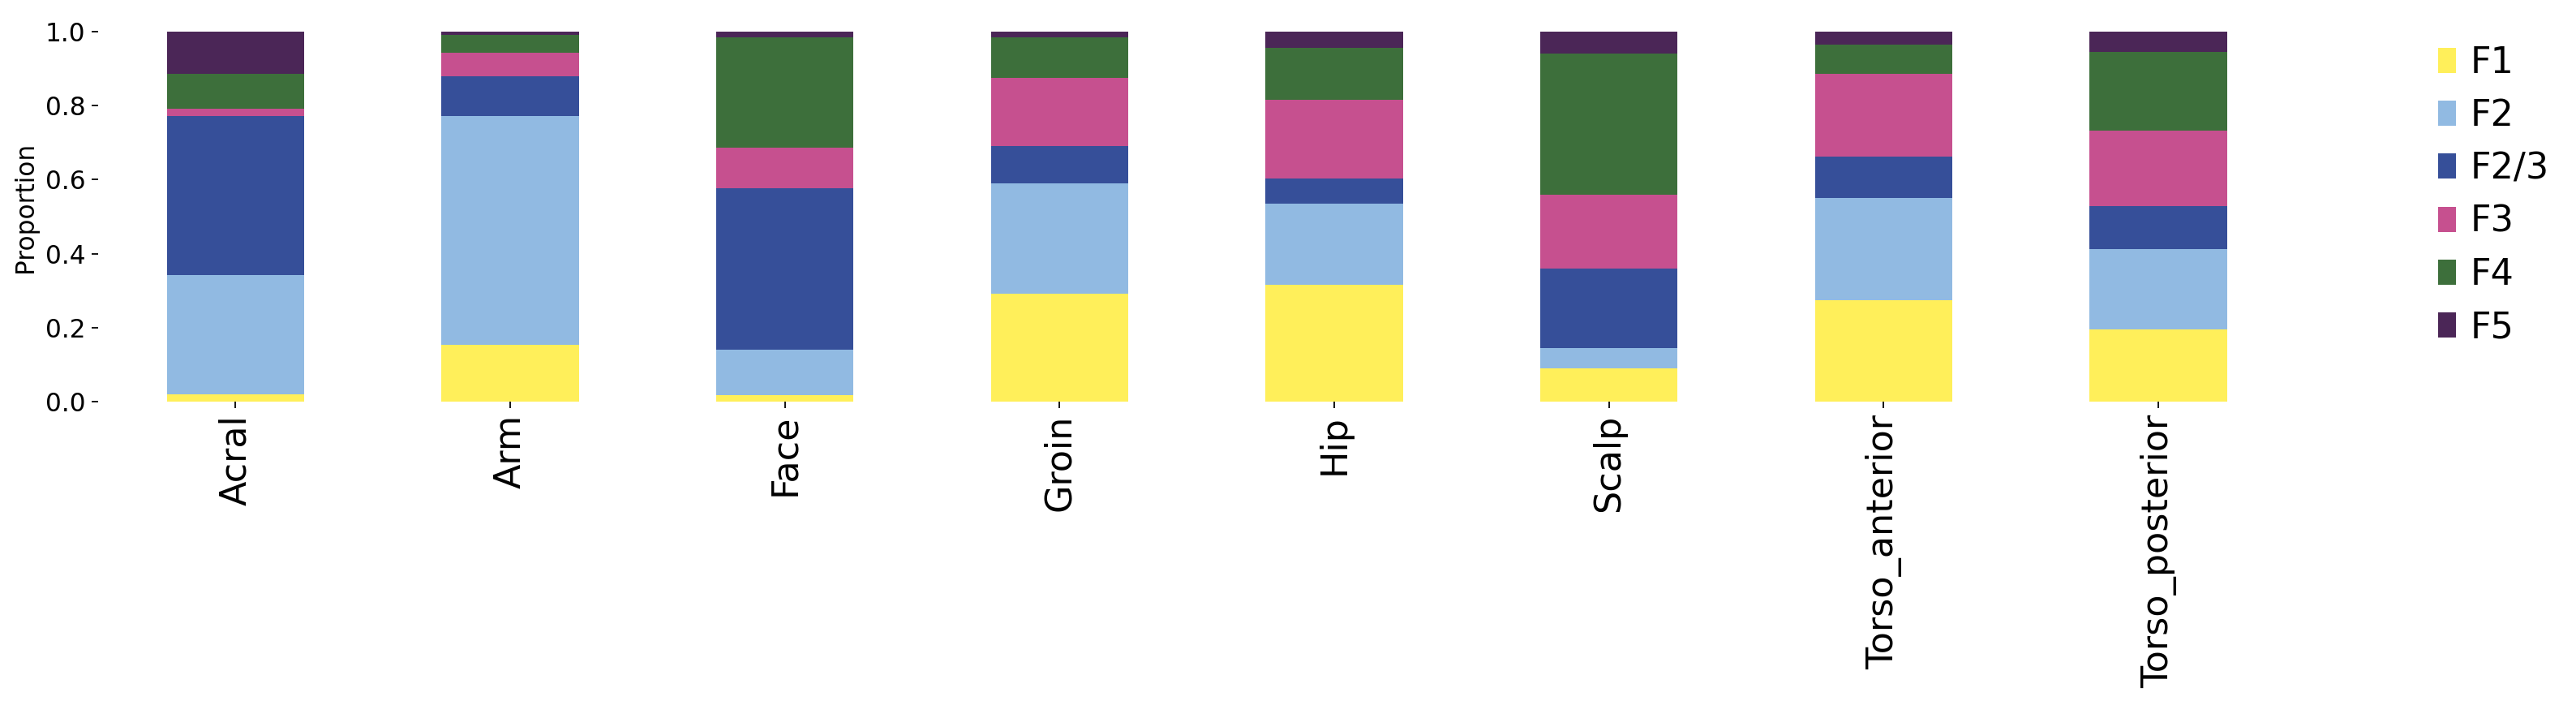

In [29]:
adata_core2=adata_core[adata_core.obs["Location"]!="Missing"]

# colors_f1 = plt.cm.YlOrBr(np.linspace(0.2, 1, 10))
# colors_f2 = plt.cm.Blues(np.linspace(0.3, 1, 10))
# colors_f3 = plt.cm.Reds(np.linspace(0.2, 1, 10))
# colors_f4 = plt.cm.Greens(np.linspace(0.4, 1, 10))
# colors_f5 = plt.cm.Purples(np.linspace(0.8, 1.0, 10))

custom_colors ={'F2':  '#91bae2',
                'F1':'#ffef5a',
                'F3': '#c6508f',
                'F4': '#3d6f3b',
                'F2/3':  '#364f99',
                'F5':  '#4b2657'

               }

grouped = adata_core2.obs.groupby(['Location', 'corefb_names_simple']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(20, 5))

color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]

proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)
plt.xlabel('')  
plt.ylabel('Proportion')  
legend = plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=20)
plt.grid(False)   
plt.box(False)   

plt.tight_layout()
plt.xticks(rotation=90, fontsize=20) 
plt.show()
 

/tmp/ipykernel_8479/39844634.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = adata_core2.obs.groupby(['Location', 'corefb_names_simple']).size().unstack(fill_value=0)


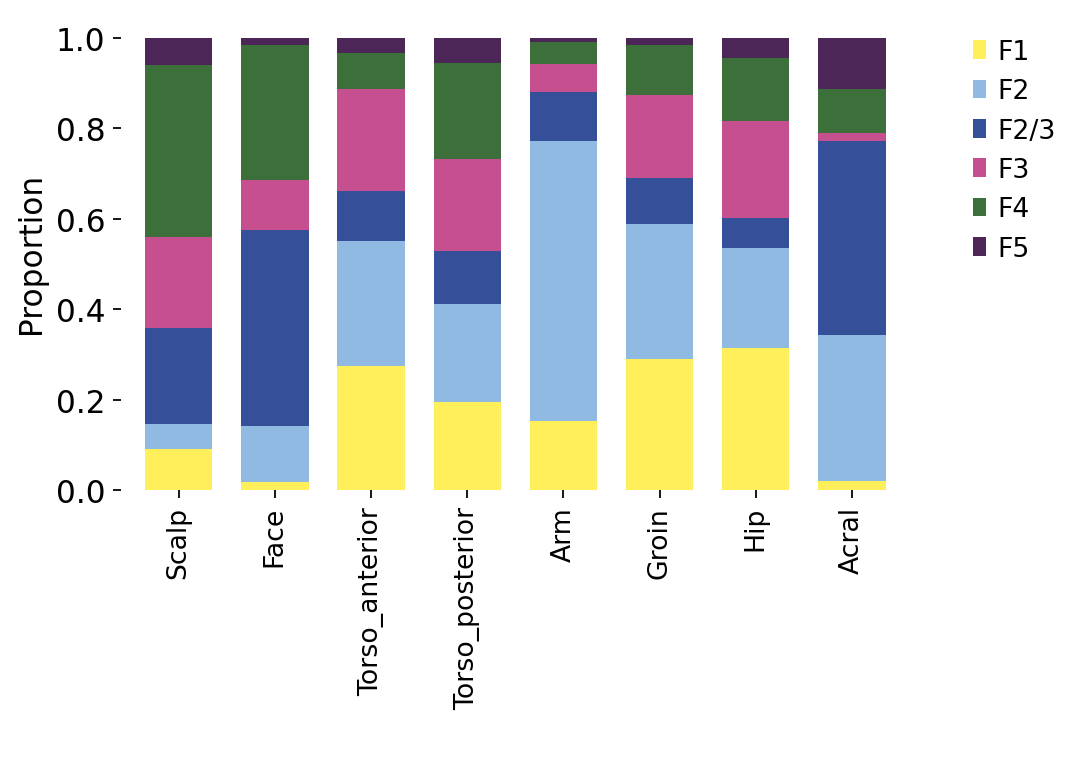

In [30]:

sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(1,4))
# colors_f1 = plt.cm.YlOrBr(np.linspace(0.2, 1, 10))
# colors_f2 = plt.cm.Blues(np.linspace(0.3, 1, 10))   
# colors_f3 = plt.cm.Reds(np.linspace(0.2, 1, 10))
# colors_f4 = plt.cm.Greens(np.linspace(0.4, 1, 10))
# colors_f5 = plt.cm.Purples(np.linspace(0.8, 1.0, 10))

location_order = ['Scalp', 'Face', 'Torso_anterior', 'Torso_posterior', 'Arm', 'Groin', 'Hip', 'Acral']

grouped = adata_core2.obs.groupby(['Location', 'corefb_names_simple']).size().unstack(fill_value=0)
grouped.index = pd.Categorical(grouped.index, categories=location_order, ordered=True)
grouped = grouped.sort_index()
proportions = grouped.div(grouped.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(7, 5))
color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]
proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list, width=0.7)   

plt.xlabel(' ', fontsize=14)  
plt.ylabel('Proportion', fontsize=14)   
legend = plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=12)
plt.grid(False)  
plt.box(False)  

plt.xticks(rotation=90, fontsize=12)
plt.margins(x=0.01)   
plt.tight_layout()
plt.savefig("sfig1/barplot_bylocation.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

In [31]:
adata_core_healthy=adata_core[adata_core.obs["Patient_status"]=="Healthy"]
adata_core_healthy.shape

(100837, 36601)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


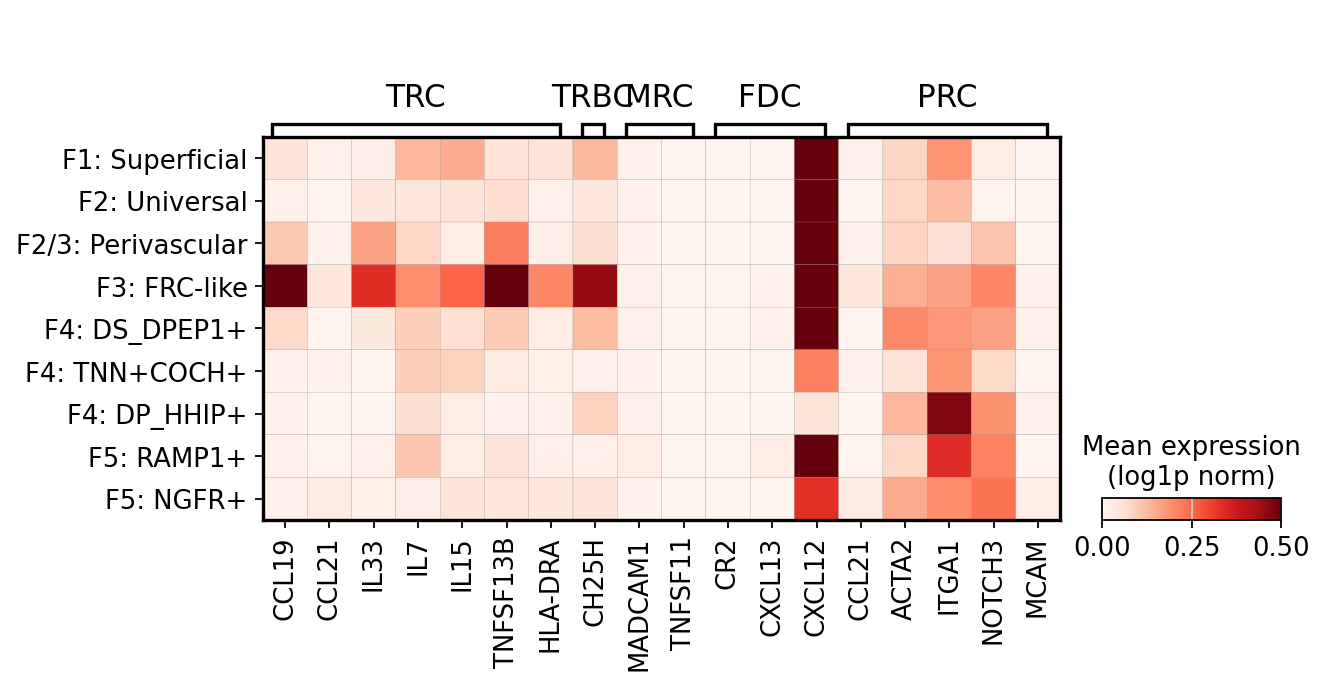

In [18]:

frc_genes = {"TRC":  ["CCL19", "CCL21",   "IL33", "IL7", "IL15", "TNFSF13B", "HLA-DRA"],
            "TRBC": ["CH25H"],
             "MRC": [ "MADCAM1", "TNFSF11" ], 
             "FDC": ['CR2',  "CXCL13", "CXCL12"],
             "PRC": ['CCL21', "ACTA2", "ITGA1", "NOTCH3", "MCAM"]
            }



sc.pl.matrixplot(
        adata_core_healthy,
        frc_genes,
        groupby="corefb_names2",
        vmax=0.5, cmap="Reds",
        dendrogram=False,
        colorbar_title="Mean expression\n(log1p norm)",
    save="frc.pdf"

    )                   



/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


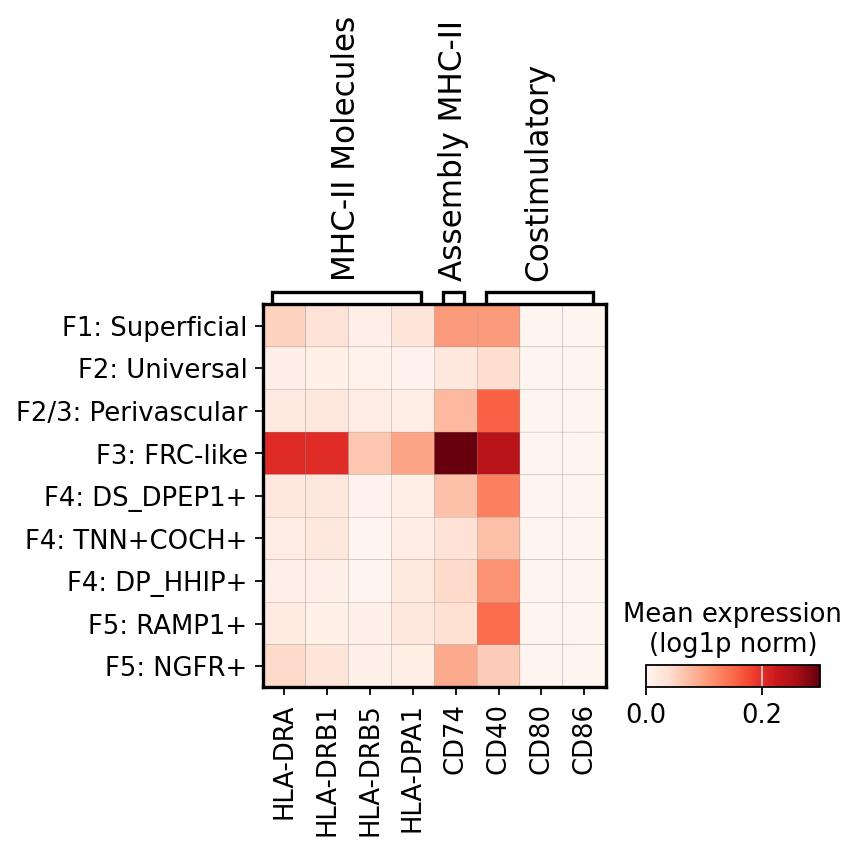

In [19]:
APC_GENES = {"MHC-II Molecules": ["HLA-DRA", "HLA-DRB1", "HLA-DRB5", "HLA-DPA1"],
             "Assembly MHC-II": ["CD74"],
             "Costimulatory": ["CD40", "CD80", "CD86"]
            }

sc.pl.matrixplot(
    adata_core_healthy,
    APC_GENES,  groupby="corefb_names2", vmax=0.3,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    save="mhc.pdf"

) 



/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

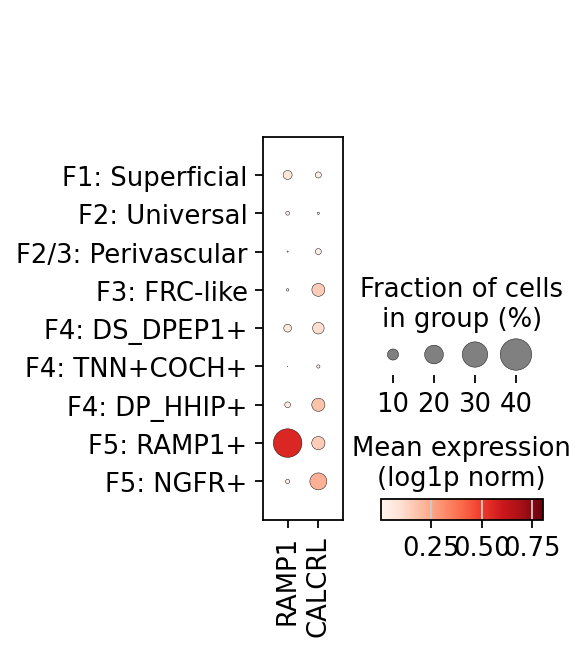

In [20]:

sc.pl.dotplot(
    adata_core_healthy,
    ["RAMP1", "CALCRL"],  groupby="corefb_names2", vmax=.8,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
   # save="mhc.pdf"

) 


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

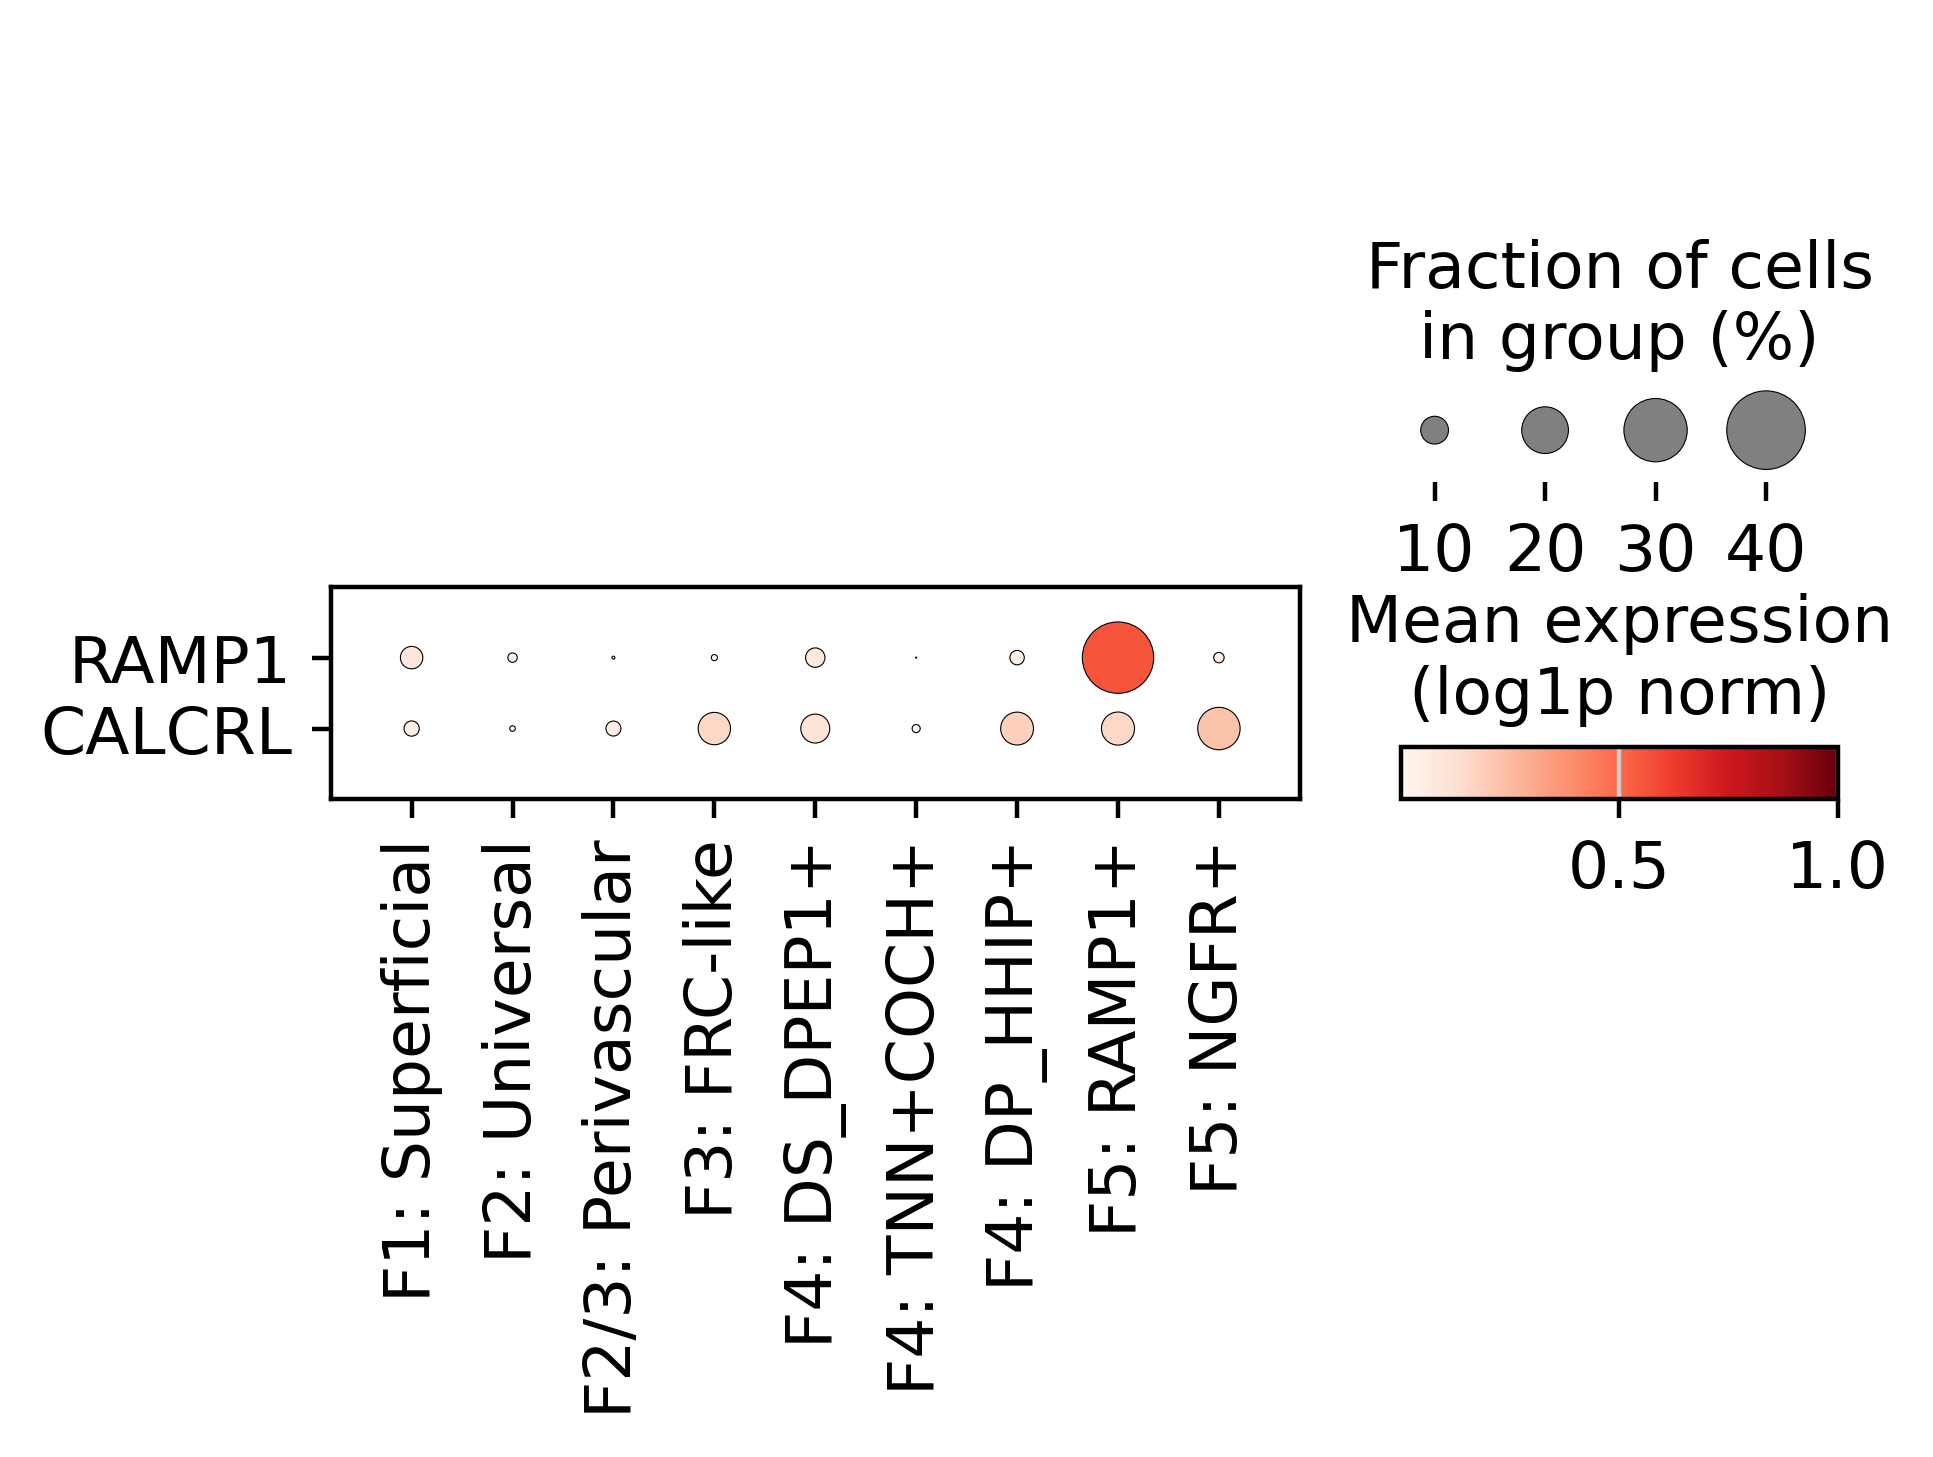

In [21]:
sc.settings.set_figure_params(dpi_save=300,  dpi=200, facecolor="white", frameon=False, figsize=(15,5))
sc.pl.dotplot(
    adata_core_healthy,
    ["RAMP1", "CALCRL"],  groupby="corefb_names2", vmax=1,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)',
    swap_axes=True
  # save="extended_fig_1l_ramp1.pdf"

) 
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(2,2))


In [22]:
# STOP

# Adata all

In [23]:
# adata_all=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30.h5ad.paga.v4')

In [24]:
# PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_healthy_with_pericytes.h5ad'
# adata_all.write(PATH)

In [25]:
PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_healthy_with_pericytes.h5ad'
adata_all=sc.read_h5ad(PATH)

In [26]:
sc.pp.normalize_total(adata_all, target_sum=1e4)
sc.pp.log1p(adata_all) 

KeyboardInterrupt: 

In [ ]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))

GENES = ['COL23A1', 'CD70', 'PPARG', 'CCL19', 'COCH', 'IGFBP2', 'SFRP4']


#adata_5k_fig2_withfb = adata_5k_fig2[adata_5k_fig2.obs["celltypes_Fig2"].str.startswith("F")]

sc.pl.matrixplot(
    adata_all,
    GENES,
    groupby="corefb_names2",
    standard_scale="var",
    dendrogram=False,
    cmap="Reds",
    #dot_max=0.5,
    colorbar_title="Mean expression\n(variance scaled)",
  #  categories_order=  ['F1: Superficial', 'F2: Universal', 'F2/3: Stroma_PPARG+', 'F3: FRC-like', 'F4: DS_DPEP1+', 'F4: TNN+COCH+',
   #                     'F5: Schwann-like',]
  
) 

In [ ]:

sc.pl.umap(
        adata_all,
        color=["corefb_names2"],
        ncols=1, s=20,
    legend_loc=None,
     legend_fontoutline=2, 
           legend_fontweight="normal", legend_fontsize=24, title='',
        frameon=False,
     save="fig1umap_supplementary.pdf"
    
    )



sc.pl.umap(
        adata_all,
        color=["corefb_names2"],
        ncols=1, s=20,
    legend_loc="on data",
     legend_fontoutline=2, 
           legend_fontweight="normal", legend_fontsize=24, title='',
        frameon=False,
     save="fig1umap_supplementary_withlabels.pdf"
    
    )

In [ ]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(2,2))

sc.pl.umap(
        adata_all,
        color=[  "PDGFRA"],
        ncols=6, s=5,
    legend_loc="on data", legend_fontoutline=2, 
           legend_fontweight="normal", legend_fontsize=24, #title='',
    vmax="p99", cmap="Reds",
        frameon=False,
   save="pdgra_expression.pdf"
    
    )
  # pdgfra, fbln1

In [ ]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))


adata_all2=adata_all[                     (adata_all.obs["corefb_names2"].str.startswith("nm"))|
                     (adata_all.obs["corefb_names2"].str.startswith("m"))|
                     (adata_all.obs["corefb_names2"].str.startswith("Peri"))|
                     #(adata_all.obs["corefb_names2"].str.startswith("F2"))|
                     (adata_all.obs["corefb_names2"].str.startswith("F5"))
                    ]



In [ ]:
RENAME ={'F2: Universal': 'Other fibroblasts',
 'F1: Superficial': 'Other fibroblasts',
 'Pericyte': 'Pericyte',
 'F2/3: Stroma_PPARG+': 'Other fibroblasts',
 'nmSchwann': 'nmSchwann',
 'F3: FRC-like':'Other fibroblasts',
 'F4: TNN+COCH+':'Other fibroblasts',
 'F4: DS_DPEP1+':'Other fibroblasts',
 'F5: NGFR+': 'F5: NGFR+',
 'F4: DP_HHIP+':'Other fibroblasts',
 'F5: RAMP1+': 'F5: RAMP1+',
 'F_Fascia': 'Other fibroblasts',
 'mSchwann': 'mSchwann'}

adata_all.obs["corefb_names3"] = adata_all.obs["corefb_names2"].map(RENAME)


RENAME ={'F2: Universal': 'F2: Universal',
 'F1: Superficial':'Other fibroblasts',
 'Pericyte': 'Pericyte',
 'F2/3: Stroma_PPARG+': 'Other fibroblasts',
 'nmSchwann': 'Schwann',
 'F3: FRC-like':'Other fibroblasts',
 'F4: TNN+COCH+':'Other fibroblasts',
 'F4: DS_DPEP1+':'Other fibroblasts',
 'F5: NGFR+': 'Other fibroblasts',
 'F4: DP_HHIP+':'Other fibroblasts',
 'F5: RAMP1+': 'Other fibroblasts',
 'F_Fascia': 'F_Fascia',
 'mSchwann': 'Schwann'}

adata_all.obs["corefb_names4"] = adata_all.obs["corefb_names2"].map(RENAME)



In [ ]:

kirstin = {
        
           "Schwann": ["SOX10", "ITGA6", 'S100B',],
            "nmSchwann": ['NGFR', 'SCN7A', #'CHD2', 
                         'L1CAM', 'NCAM1'] ,
            "mSchwann": ['NFASC', 'NCMAP', 'MBP', 'PRX'], 
          
           #'endoneurial NAF': ['SOX9', 'OSR2', 'P4HB', 'CSPG4', 'CD34', "PDGFRB"],
          # 'perineurial NAF': ['SLC2A1', 'ITGA6',], 
    "Unique to F5": [ 'PLEKHA6',  'TENM2','PEAR1',  #'APOD', 'CYP1B1',
                      ],

  "F5 (both)": [  "FGFBP2","SCN7A" ,"FMO2", "TAC1",   #"S100B" 
              ],
                      "F5+: RAMP1": ["RAMP1", "RELN", 'PLEKHA6',  "IGFBP2", 'SFRP1', "COL26A1", "OLFML2A" #"TAC1"
                                   ], #"CPE", "PTN", "IGF1", 

 'F5: NGFR+': [   "NGFR",  "TM4SF1", 'SFRP4',"ANGPTL7",   "ITGA6", "CDH19",  "CLDN1", #"FOXS1", #"SOX17",
                'EBF2', #"CAVIN2", "SFRP5", #"TNNC1"
                     ],
    "Fibroblasts": ["PDGFRA", "LUM", "DCN",],
                    "Pericyte": ["RGS5"]}

sc.pl.dotplot(
    adata_all,
    kirstin,
    groupby="corefb_names3",
    vmax=1.5,
    colorbar_title='Mean expression\n(log1p norm)', 
    categories_order = [
        'nmSchwann', 'mSchwann','F5: RAMP1+', 'F5: NGFR+', 'Other fibroblasts',  'Pericyte', ],
    save="schwann.pdf"
    #standard_scale="var", #swap_axes=True
)

In [ ]:
adata_all2=adata_all[(adata_all.obs["corefb_names2"].str.startswith("F_Fas"))|
                     (adata_all.obs["corefb_names2"].str.startswith("F2:"))
       
                    ]

F_Fascial_genes= {
"F2: Universal markers" :['CD34',
  'PI16',    'DPP4', 'MFAP5', 'PCOLCE2' , 'CTHRC1',   'SLPI',#  "TSPAN8",#'MATN4',
              #"CD24",  
           "CD70", "LGR5",#"KLF4"
              ],
    "F_Fascia markers":  [ "DPP4",
                           
                                     "CDH13",# "IL13RA1","IL13RA2",
                          
                                      "PRG4", "CCN3", "CCN5","PROCR",# "IL4R",
                                        "ALDH1A1", "CRTAC1", "ITGA10",   "THBS4",  #"GALNT15",
                                       "MYOC", "SCX", "FGF18",    "CILP2",  "CHAD",
                           'THBS4', 'EVI2A', 
                   
                                      ],
                 }
sc.pl.dotplot(
    adata_all2,
    F_Fascial_genes,
    groupby="corefb_names2",
    vmax=1.5,
        colorbar_title='Mean expression\n(log1p norm)', 
    save="fascia.pdf"
)

sc.pl.matrixplot(
    adata_all2,
    F_Fascial_genes,
    groupby="corefb_names2",
    vmax=1.5,
        colorbar_title='Mean expression\n(log1p norm)', 
    save="fascia_matrixplot.pdf",
    cmap="Reds"
)

In [ ]:
adata_all2=adata_all[(adata_all.obs["corefb_names2"].str.startswith("F_Fas"))|
                     (adata_all.obs["corefb_names2"].str.startswith("F2"))
       
                    ]

F_Fascial_genes2= { "F2: Universal": ['CD34',
  'PI16',    'DPP4', 'MFAP5', 'PCOLCE2' , 'CTHRC1',   'SLPI',#  "TSPAN8",#'MATN4',
              #"CD24",  
           "CD70", "LGR5",#"KLF4"
              ],
      'F2/3': ['CXCL12', 'APOE', 'EFEMP1', #'GGT5', 
                                    "APOC1", "C7", "PLA2G2A", 'PPARG', #"CD36",
                                          #'IL1RL1', 'MARCH3', 'PCSK1', 
                                          
                                          
                                          # "FMO1", 
                                          
                                   # "PPARG", "TNFSF14"
                           "MYOC", "GDF10", # "LINC-PINT", 
                             # "POU3F3", 
                                  # "TNNT3", 
                    ],
                    "F_Fascia markers":  [  
                           
                                     "CDH13",# "IL13RA1","IL13RA2",
                          
                                      "PRG4", "CCN3", "CCN5","PROCR",# "IL4R",
                                        "ALDH1A1", "CRTAC1", "ITGA10",   "THBS4",  #"GALNT15",
                                 "SCX", "FGF18",    "CILP2",  "CHAD",
                           'THBS4', 'EVI2A', 
                   
                                      ],
                 }
sc.pl.dotplot(
    adata_all2,
    F_Fascial_genes2,
    groupby="corefb_names2",
    vmax=1.2,
        colorbar_title='Mean expression\n(log1p norm)', 
    save="fascia.pdf"
)

sc.pl.matrixplot(
    adata_all2,
    F_Fascial_genes2,
    groupby="corefb_names2",
    vmax=1.2,
        colorbar_title='Mean expression\n(log1p norm)', 
    save="fascia_matrixplot.pdf",
    cmap="Reds"
)

In [ ]:
# file_path = '/nfs/team298/ls34/fb_dict.pkl'

# with open(file_path, 'rb') as file:
#     reynolds_short_final = pickle.load(file)

# print("Dictionary successfully loaded:")


In [ ]:
sc.logging.print_versions()


